In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import pandas as pd
import numpy as np

from preprocessor import AtomDataset
from randomizer import RandomTranslation, RandomRotation, RandomReflection
from randomizer import augment_data

torch.manual_seed(114514)

In [2]:
dataset = AtomDataset(root='./', threshold=2.0)
data = dataset[0]
print(data)

Data(x=[55, 6], edge_index=[2, 126], y=[55, 1])


In [3]:
augmented_dataset, original_ys = augment_data(data=data, num_new_data=100, moment_noise=2)

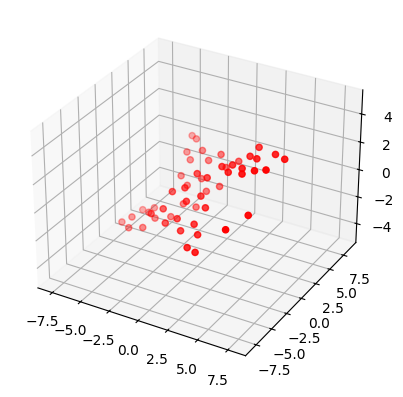

In [4]:
import matplotlib.pyplot as plt

coords = augmented_dataset[95].x[:, -3:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c='r', marker='o')

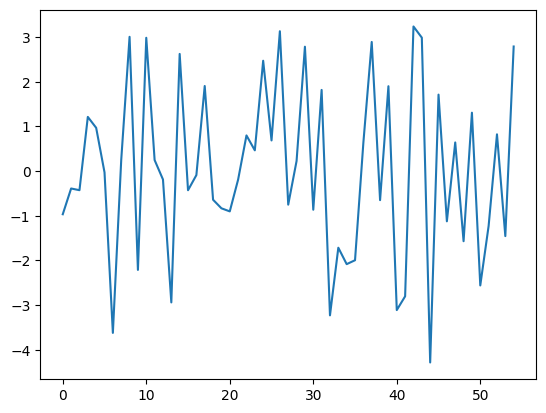

In [8]:
plt.plot(augmented_dataset[2].y - original_ys[2])

In [ ]:
class GNNModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        # x: (num_nodes, in_channels)
        # edge_index: (2, E)
        x = self.conv1(x, edge_index)
        x = torch.relu(x)

        x = self.conv2(x, edge_index)
        x = torch.relu(x)

        x = self.conv3(x, edge_index)
        # x: (num_nodes, out_channels=1)
        
        return x